In [2]:
numFile = 16

* recording
8000
* done recording


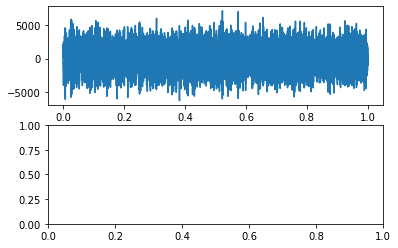

Keep audio file (y/n)n


In [7]:
import pyaudio
import wave
import time

CHUNK = 2
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000
RECORD_SECONDS = 1.0
RECORD_DELAY = 0.3
WAVE_OUTPUT_FILENAME = "bamboozle/bamboozle_a_" + str(numFile) +".wav"

def skip(seconds):
    samples = int(seconds * RATE)
    count = 0
    while count < samples:
        stream.read(CHUNK)
        count += CHUNK
        time.sleep(0.01)

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")
frames = []

for i in range(0, int(RATE / CHUNK * (RECORD_SECONDS+RECORD_DELAY))):
    data = stream.read(CHUNK)
    if i >= int(RATE / CHUNK * (RECORD_SECONDS+RECORD_DELAY)) - int(RATE / CHUNK * RECORD_SECONDS):
        frames.append(data)

print(int(RATE / CHUNK * RECORD_SECONDS))
print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()


import matplotlib.pyplot as plt
import numpy as np
import time
# from pydub import AudioSegment
from scipy.io import wavfile
import random
import sys
import io
import os
import pathlib
import glob

import IPython
import IPython.display as ipd


fs, test_wav = wavfile.read(WAVE_OUTPUT_FILENAME)

plt.subplot(2,1,1)
plt.plot(np.arange(len(test_wav))/fs, test_wav)
plt.subplot(2,1,2)
ipd.Audio(test_wav, rate=fs)
plt.show()
x = input("Keep audio file (y/n)")

if x == 'y':
    numFile += 1
    
ipd.Audio(test_wav, rate=fs)